# MongoDB basic commands

### Banco de dados NoSQL

><p> Os bancos de dados NoSQL oferecem uma arquitetura muito mais escalável e eficiente que os bancos relacionais e facilitam consultas no-sql de dados semi-estruturados ou não estruturados</p>

>Apresentam 4 categorias:
>* Graphs Databases: Usados em redes sociais, por exemplo;
>* Document Databases: Armazena documentos;
>* Key-values: Dados são armazenados no formato chave-valor;
>* Column Family Stores: Dados são organizados em colunas.



Lista dos Banco de dados não relacionais que estão no mercado atualmente:  https://hostingdata.co.uk/nosql-database/

### Quando usar RDBMS e quando usar NoSQL

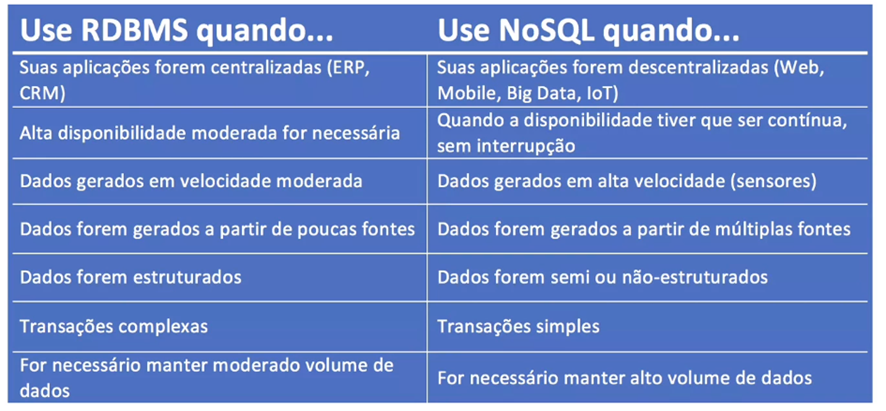

### MongoDB

> É um banco de dados NoSQL orientado a documento, substitui o conceito de "linha" como em bancos de dados relacionais, por um modelo mais flexível, o "documento".

> Nomenclatura MongoDB

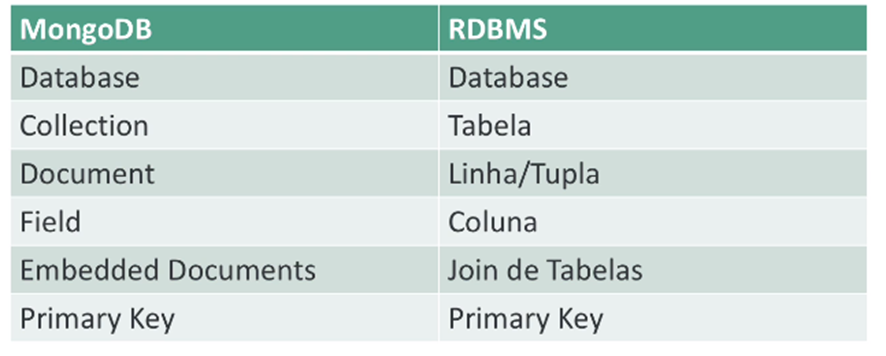

#### No terminal

> a primeira etapa é inicializar o mongodb no terminal, para isso, no CMD digite: *mongod*

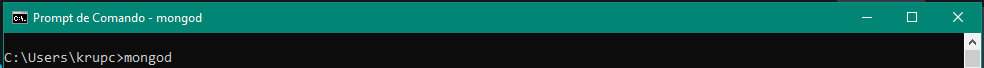

In [2]:
!pip install pymongo

You should consider upgrading via the 'c:\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
# Importamos o MongoClient para conectar nossa aplicação ao MongoDB
from pymongo import MongoClient

In [5]:
# Estabelecemos a conexão ao Banco de Dados
con = MongoClient('localhost', 27017)

In [7]:
type(con)

pymongo.mongo_client.MongoClient

In [11]:
# Uma única instância do MongoDB pode suportar diversos bancos de dados.
# Vamos criar o banco de dados cadastrodb
db = con.cadastrodb
type(db)

pymongo.database.Database

In [12]:
# Uma coleção é um grupo de documentos armazenados no MongoDB
# (Relativamente parecido com o conceito de tabelas em bancos relacionais)
collection = db.cadastrodb
type(collection)

pymongo.collection.Collection

> Uma nota importante sobre coleções (e bancos de dados) no MongoDB é que eles são criados posteriormente - nenhum dos comandos acima executou efetivamente qualquer operação no servidor MongoDB. Coleções e bancos de dados são criados quando o primeiro domcumento é inserido

> Dados no MongoDB são representados (e armazenados) usando documentos JSON (Java Script Object Notation). Com o PyMongo usamos dicionários para representar documentos.

In [22]:
import datetime
post1 = {
    "codigo": "ID-998775",
    "prod_name": "Televisão",
    "marcas": ["LG", "Philco", "Sony", "Samsung"],
    "data_cadastro": datetime.datetime.utcnow()
}

post2 = {
    "codigo": "ID-998776",
    "prod_name": "Geladeira",
    "marcas": ["Brastemp", "Eletrolux"],
    "data_cadastro": datetime.datetime.utcnow()
}

post3 = {
    "codigo": "ID-998777",
    "prod_name": "Liquidificador",
    "marcas": ["Mondial", "Multilase", "Philco"],
    "data_cadastro": datetime.datetime.utcnow()
}
type(post1)

dict

In [23]:
collection = db.posts

#### Insert
Inserindo registros no MongoDB

In [25]:
#Inserindo um único registro por vez
#post_id = collection.insert_one(post1)
#Inserindo vários registros de uma vez
post_id = collection.insert_many([post1, post2, post3])

BulkWriteError: {'writeErrors': [{'index': 0, 'code': 11000, 'keyPattern': {'_id': 1}, 'keyValue': {'_id': ObjectId('61c0cc093269fb76016974f9')}, 'errmsg': "E11000 duplicate key error collection: cadastrodb.posts index: _id_ dup key: { _id: ObjectId('61c0cc093269fb76016974f9') }", 'op': {'codigo': 'ID-998775', 'prod_name': 'Televisão', 'marcas': ['LG', 'Philco', 'Sony', 'Samsung'], 'data_cadastro': datetime.datetime(2021, 12, 20, 18, 31, 35, 640666), '_id': ObjectId('61c0cc093269fb76016974f9')}}], 'writeConcernErrors': [], 'nInserted': 0, 'nUpserted': 0, 'nMatched': 0, 'nModified': 0, 'nRemoved': 0, 'upserted': []}

In [26]:
# Quando um documento é inserido uma chave especial, "_id", é adicionada 
# automaticamente se o documento ainda não contém uma chave "_id".
post_id

#### Read
Lendo registros do MondoDB

In [28]:
for reg in collection.find():
    print(reg)

{'_id': ObjectId('61c0caf73269fb76016974f8'), 'codigo': 'ID-998775', 'prod_name': 'Televisão', 'marcas': ['LG', 'Philco', 'Sony', 'Samsung'], 'data_cadastro': datetime.datetime(2021, 12, 20, 18, 21, 15, 641000)}
{'_id': ObjectId('61c0cc093269fb76016974f9'), 'codigo': 'ID-998775', 'prod_name': 'Televisão', 'marcas': ['LG', 'Philco', 'Sony', 'Samsung'], 'data_cadastro': datetime.datetime(2021, 12, 20, 18, 31, 35, 640000)}
{'_id': ObjectId('61c0cc093269fb76016974fa'), 'codigo': 'ID-998776', 'prod_name': 'Geladeira', 'marcas': ['Brastemp', 'Eletrolux'], 'data_cadastro': datetime.datetime(2021, 12, 20, 18, 31, 35, 640000)}
{'_id': ObjectId('61c0cc093269fb76016974fb'), 'codigo': 'ID-998777', 'prod_name': 'Liquidificador', 'marcas': ['Mondial', 'Multilase', 'Philco'], 'data_cadastro': datetime.datetime(2021, 12, 20, 18, 31, 35, 640000)}


In [31]:
reg = collection.find_one({"prod_name": "Televisão"})
print(reg)

{'_id': ObjectId('61c0caf73269fb76016974f8'), 'codigo': 'ID-998775', 'prod_name': 'Televisão', 'marcas': ['LG', 'Philco', 'Sony', 'Samsung'], 'data_cadastro': datetime.datetime(2021, 12, 20, 18, 21, 15, 641000)}


In [36]:
reg = collection.find_one({"marcas": "Philco"})
print(reg)

{'_id': ObjectId('61c0caf73269fb76016974f8'), 'codigo': 'ID-998775', 'prod_name': 'Televisão', 'marcas': ['LG', 'Philco', 'Sony', 'Samsung'], 'data_cadastro': datetime.datetime(2021, 12, 20, 18, 21, 15, 641000)}


In [41]:
lst = collection.find({"marcas": "Philco"})
for reg in lst:
    print(reg)

{'_id': ObjectId('61c0caf73269fb76016974f8'), 'codigo': 'ID-998775', 'prod_name': 'Televisão', 'marcas': ['LG', 'Philco', 'Sony', 'Samsung'], 'data_cadastro': datetime.datetime(2021, 12, 20, 18, 21, 15, 641000)}
{'_id': ObjectId('61c0cc093269fb76016974f9'), 'codigo': 'ID-998775', 'prod_name': 'Televisão', 'marcas': ['LG', 'Philco', 'Sony', 'Samsung'], 'data_cadastro': datetime.datetime(2021, 12, 20, 18, 31, 35, 640000)}
{'_id': ObjectId('61c0cc093269fb76016974fb'), 'codigo': 'ID-998777', 'prod_name': 'Liquidificador', 'marcas': ['Mondial', 'Multilase', 'Philco'], 'data_cadastro': datetime.datetime(2021, 12, 20, 18, 31, 35, 640000)}


#### Outros comandos

In [42]:
#Verificar os banco de dados disponíveis
db.name

'cadastrodb'

In [45]:
#Listando as coleções disponíveis
db.list_collection_names()

['posts']

#### Retornando dados do MongoDB com o Pymongo
> Exemplo de registros não estruturados no banco de dados.

In [2]:
con = MongoClient('localhost', 27017)

In [4]:
# Listando os bancos de dados disponíveis
con.list_database_names()

['admin', 'cadastrodb', 'config', 'local', 'twitterdb']

In [5]:
# Definindo o objeto db
db = con.cadastrodb

In [6]:
# Criando uma coleção
db.create_collection("mycollection")

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'cadastrodb'), 'mycollection')

In [7]:
# Inserindo um documento na coleção criada
db.mycollection.insert_one({
   'title': 'MongoDB study', 
   'description': 'MongoDB is a NoSQL Database',
   'by': 'Data Science Academy',
   'url': 'http://www.datascienceacademy.com.br',
   'tags': ['mongodb', 'database', 'NoSQL'],
   'likes': 100
})

In [8]:
# Retornando o documento criado
db.mycollection.find_one()

{'_id': ObjectId('61c0e97f1d1d41c8e2196594'),
 'title': 'MongoDB study',
 'description': 'MongoDB is a NoSQL Database',
 'by': 'Data Science Academy',
 'url': 'http://www.datascienceacademy.com.br',
 'tags': ['mongodb', 'database', 'NoSQL'],
 'likes': 100}

In [9]:
# Preparando um documento
db.mycollection.insert_one({"Site":"http://www.datascienceacademy.com.br",
                            "facebook":"facebook.com/dsacademybr"})

In [10]:
# Retornando os documentos na coleção
for rec in db.mycollection.find():
    print(rec)

{'_id': ObjectId('61c0e97f1d1d41c8e2196594'), 'title': 'MongoDB study', 'description': 'MongoDB is a NoSQL Database', 'by': 'Data Science Academy', 'url': 'http://www.datascienceacademy.com.br', 'tags': ['mongodb', 'database', 'NoSQL'], 'likes': 100}
{'_id': ObjectId('61c0e9c01d1d41c8e2196595'), 'Site': 'http://www.datascienceacademy.com.br', 'facebook': 'facebook.com/dsacademybr'}


In [11]:
# Contando os documentos em uma coleção
db.mycollection.estimated_document_count()

2